#**Exponential smoothing**



##  install these libraries using pip:



In [67]:
!pip install pandas matplotlib

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


## Loading dataset

In [69]:
data = pd.read_csv('/content/traffic (1).csv')
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [70]:
# prompt: data = pd.read_csv('/content/traffic (1).csv') make DateTime index

data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date
data = data.set_index('DateTime')


## Visualizing the data





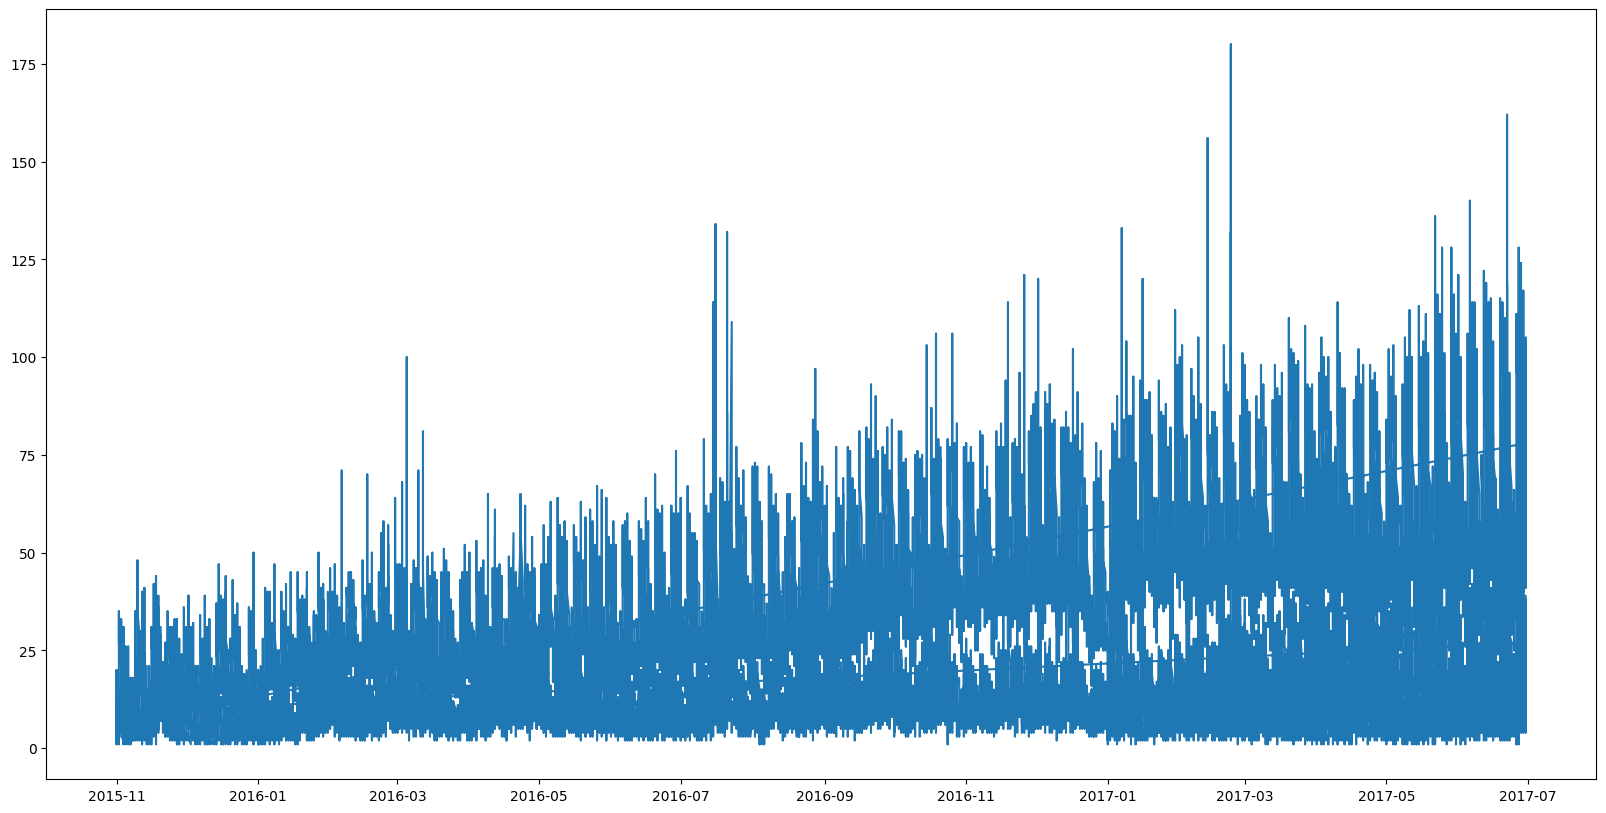

In [71]:
# prompt: plt.plot(data['Vehicles'])
# plt.show()  make photo big

plt.figure(figsize=(20, 10))
plt.plot(data['Vehicles'])
plt.show()


#**Single Exponential smoothing**





/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


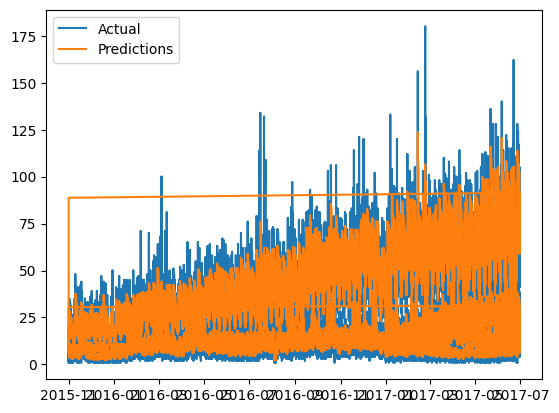

<Figure size 2500x2000 with 0 Axes>

In [72]:
model = SimpleExpSmoothing(data['Vehicles']).fit(smoothing_level=0.2)

predictions = model.predict(start=0, end=len(data['Vehicles'])-1)

plt.plot(data['Vehicles'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.figure(figsize=(25, 20))
plt.show()


## Making predictions





In [73]:
future_predictions = model.predict(start=len(data['Vehicles']), end=len(data['Vehicles'])+11)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Single Exponential Smoothing




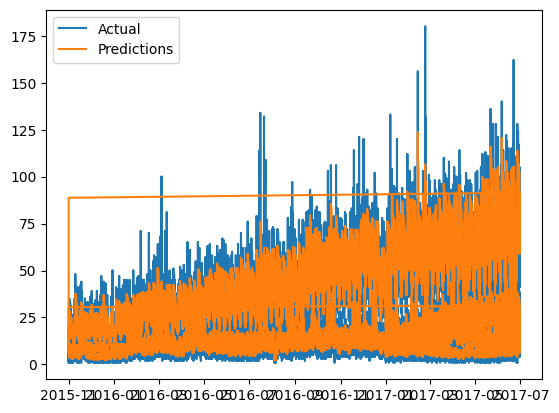

<Figure size 2000x2000 with 0 Axes>

In [74]:
plt.plot(data['Vehicles'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.figure(figsize=(20, 20))
plt.show()


#**Double Exponential Smoothing**




In [75]:
model = Holt(data['Vehicles']).fit(smoothing_level=0.8, smoothing_slope=0.2)


predictions = model.predict(start=0, end=len(data['Vehicles'])-1)




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-75-be0406a666fd>:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = Holt(data['Vehicles']).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


## Making predictions



In [76]:
future_predictions = model.predict(start=len(data['Vehicles']), end=len(data['Vehicles'])+11)




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Double Exponential Smoothing




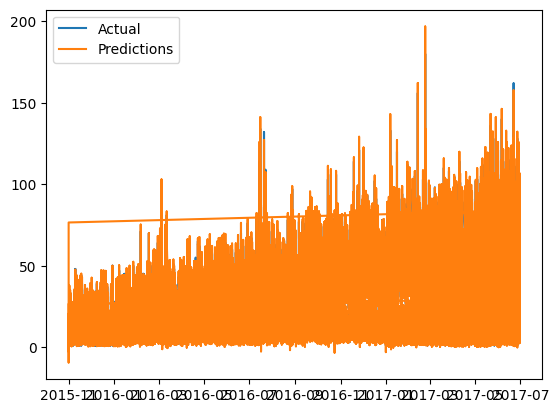

<Figure size 2000x1000 with 0 Axes>

In [77]:
plt.plot(data['Vehicles'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.figure(figsize=(20, 10))
plt.show()


#**Holt-Winter’s Seasonal Smoothing**






In [78]:
model = ExponentialSmoothing(data['Vehicles'], seasonal_periods=12, trend='add', seasonal='add').fit()

predictions = model.predict(start=0, end=len(data['Vehicles'])-1)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## Making predictions



In [79]:
future_predictions = model.predict(start=len(data['Vehicles']), end=len(data['Vehicles'])+11)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Triple Exponential Smoothing




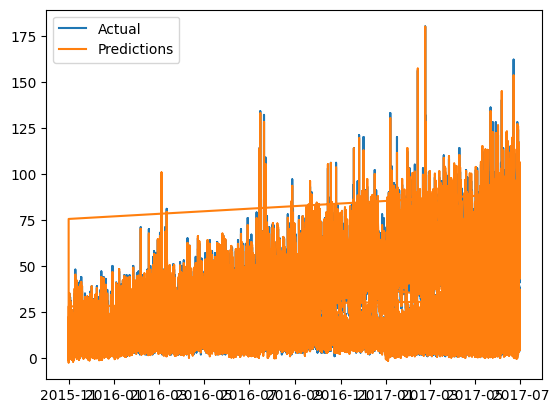

In [80]:
plt.plot(data['Vehicles'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()


##**Well done :)**